# Content

- **Introduction to business case : Machine Learning Engineer at Google**
- **Probablilistic models**
  - Computing probabilities of words
- **N-gram Introduction**
  - Unigram models
  - Bigram models
  - Trigram models
  - Building N-gram models: Maximum Likelihood Estimation
- **Training an N-gram model**
  - Assumptions
  - Evaluating a Unigram model
  - Evaluating a Bigram model
  - Expanding this method to N-gram models
- **Evaluation Metrics**
  - Average Log Likelihood
  - Cross entropy
  - Perplexity
- **Smoothing: Considering unknown tokens**
  - Laplace smoothing
  - K smoothing
  - Add one smoothing
  - Backoff and Interpolation
- **Ambiguity in language models**
- **Limitations of N-gram approach**
- **Dataset Processing, training and evaluation**
  - Dataset EDA
    - Email length vs number of emails
    - WordCloud
  - Dataset Processing
    - Train-Test split
  - Creating N-gram models
    - Bigram model
    - Trigram model
  - Evaluating These models
    - Perplexity
  - Expanding beyond trigram: Generalized ngram model
- **Overcoming limitations: Better techniques**
  
- **Conclusion**

# Email autofill
You are working as machine learning engineer at Gmail team at Google. Your manager want you to design a solution to suggest the next word in email when they are typing it, to improve their experience and save time.
Example as we can see in the below image:-

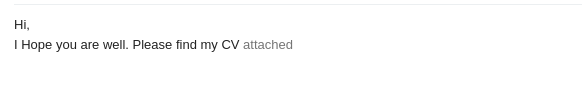



**What are the other real life application of autofill?**
1.typing in whatsapp (auto suggest three possible next words) 
2.Autofill Google Search
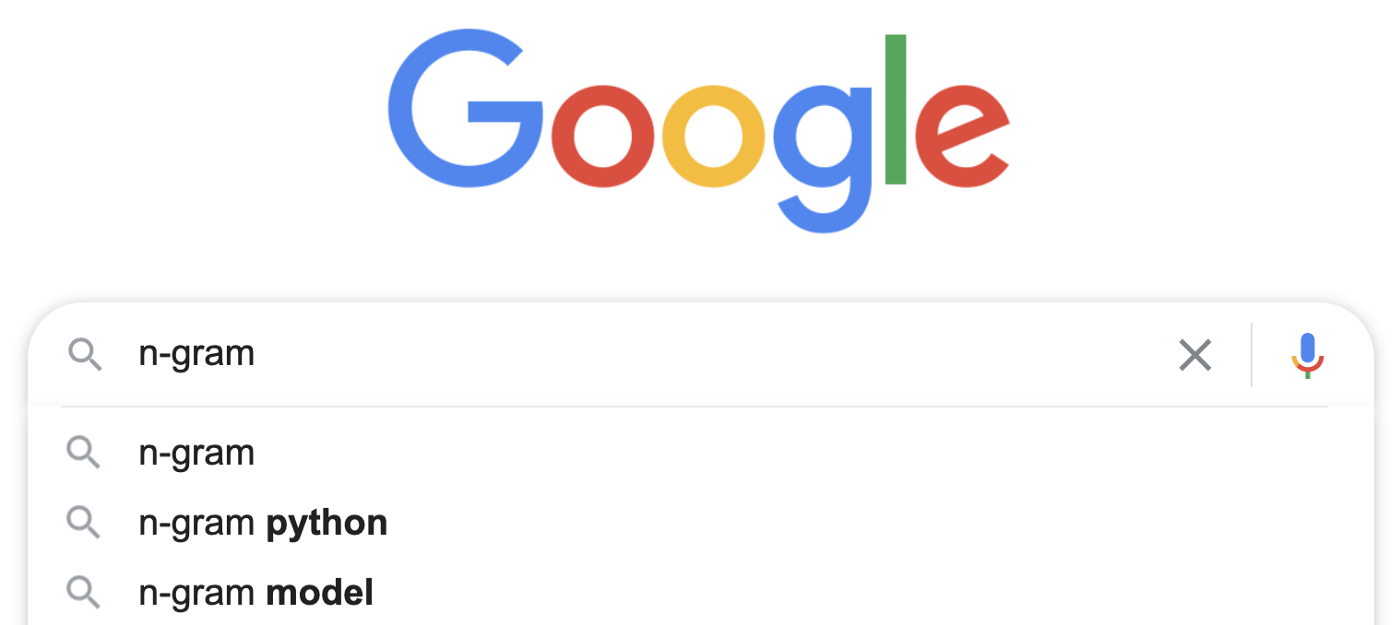


##How can we implement this feature ??
1.We can get an idea which word sequence came frequently in training data. for example we can see that in most cases "please find my CV" is followed by word "attached". 



---
## What Approach will be used?
---

- We can build a model that'll `learn probabilities` of the `next words`:
    - Given a sequence of words, we can `predict the probabilities` of all other words and ascertain their chances of being the next word.
    - The word with the `highest probability`, given the sequence, can be `suggested as the most probable "next word"` to the user.

## But, why probabilities?
Let us explore a series of question based on an example to understand the **intuition** -

**Sentence 1**: "the cat is small"

**Sentence 2**: "small the cat is"

**Which sentence among the above is correct?** 

- Sentence 1

**How did we arrive at the answer?**

- Based on the `order of the words`.

**How did we determine the correctness of order of words?**

- Based on the frequency or `number of times we have seen words occur next to each other` as we learn the language.

**Let's understand our problem statement**
  - Given that a set of words $w_1, w_2, w_3, w_4, ..., w_k$, predict the next word, $w_{k+1}$
  - Inspired by naive bayes, we compute conditional probability, $P(w_{k+1} | w_k, w_{k-1}, w_{k-3}, ...)$
  - Our problem is similar to a multi-class classification problem, where we predict $w_k$ with $w_{k-1}, w_{k-2}, w_{k-3} ... w_1$ as inputs

We can formalize the above intuition by building **Probabilitistic Language Models**.

## What are Probabilitistic Language Models (PLM)?
- Probabilistic Language Models (PLM) `assign a probability to each possible next word` in the sequence based on their `relative likelihood of occurence`. 
- Goal of Probabilistic Language Model is to `calculate probability of a sentence of sequence of words`.
- This knowledge is then leveraged to find the probability of next word in the sequence.

## How can we calculate the Probabilities?
- We can model this as a conditional probability, wherein, having seen a word we can predict the probability of next word. 

## What are probabilities of words with an example?

- Let us predict the probability of the sentence - "Its water is so transparent".
- Using chain rule, the probability can be calculated using:
    - $P$(its water  is  so  transparent) = $P$(its) * $P$(water|its) * $P$(is|its water) * $P$(so|its water is) * $P$(transparent|its water is so)
    
#### Do we notice pitfalls with the above equation?
- We will have to calculate a `lot of probabilities` with as the size of sentence scales. 

#### How about we simply estimate by counting and dividing the results?
- $P$(transparent | its water is so) = $\frac{count(its water is so transparent)}{count(its water is so)}$

#### What are drawbacks with the above?
- There are far too many possible sentences in this method that would need to be calculated.
- This will result in `very sparse data` making results unreliable.
- Also, language is creative, any particular context might have not occured before.

## How can we then compute the exact probability of a word, given long sequence of preceding words?
- We could leverage `Markov property` or its extensions to predict the probabilities of the next words.
- `Markov theorem` explains that the future states are dependent only on the present states.
- Thus, instead of computing the probability of a word based on entire history, `approximates the history by just the last few words`.
- In other words, the probability of the next word can be estimated given only the previous k number of words.
    - If k = 1; P(transparent | its water is so) ≈ P(transparent | so)
    - If k = 2; P(transparent | its water is so) ≈ P(transparent | is so)
    - and so on ...
    
    
    
      


We can formalize the Markov Assumptions to **build N-gram models** to predict the next words, where $k = n-1$.

---
# What are N-gram models?
---
- An N-gram language model predicts the `probability of a given N-gram within any sequence of words` in the language. 
- If we have a good N-gram model, we can predict p(w | h) – what is the probability of seeing the word w given a history of previous words h – where the history contains n-1 words.

#### What are N-grams? An Example:
- An `N-gram is a sequence of N tokens or words`.

**Sentence** - "I love reading about Natural Language Processing"

**1-gram or uni-gram** - One word sequence --> 'I', 'love', 'reading', 'about', 'natural', 'language', 'processing'.

**2-gram or bi-gram** - Two word sequence --> 'I love', 'love reading', 'reading about', 'about natural', 'natural language', 'language processing'

**3-gram or tri-gram** - Third word sequence --> 'I love reading', 'love reading about', 'reading about natural', 'about natural language', 'natural language processing'.



## How do N-gram Language Models work?
- N-gram Language models, where 'n' can take values from 1, `approximates the probability of a word given previous words` by using the conditional probability of the preceding word(s).


Let' look at an example where a sentence has to be formed based on the previous words. 




##Should we see all the words typed to predict the possible next word ??

1.Find the probability of each word.  Do not see any previous word, simply recommend the most probable word in the corpus. (**Unigram**)
> **P(I have a dream) = P(I) * p(have) * p(a) * p(dream)**




2. Find the probability of a set of two words (how the given two words come together). - **Bigram**
> **P(I have a dream) = P(I/<start>) * p(have/I) * p(a/have) * p(dream/a)**
3.Find the proability of a set of three words i.e. next word will be recommended on the basis of previous two words - **Trigram**
> **P(I have a dream) = P(I/<start>,<start>) * p(have/<start>, I) * p(a/i,have) * p(dream/have,a)**
4.Find the probabiliy of a set of n words i.e. next word will be recommended on the basis of last n-1 words - **n-gram**


Assume Let's assume we have a corpus of only 3 sentences. Let's try to frame the sentence: "I have a dream"

|text|
|-|
|< start > I want a dream job </ start >|
|< start > I have a dog </ start >|
|< start > I have a dream company </ start >|

# What is Uni-gram Model?

* **Unigram** - For uni-gram models we do not look at the previous words to predict the next word.
* Each word probability is calculated to predict the occurance

Count table

|< start >|I|want|a|dream|job|have|dog|company|< / start >|
|-|-|-|-|-|-|-|-|-|-|
| 3/20 | 3/20 | 1/20 | 3/20 | 2/20 | 1/20 | 2/20 | 1/20 | 1/20 | 3/20|

* Calculate the probabilities of occurance of each word in the corpus.

Probability

|< start >|I|want|a|dream|job|have|dog|company|< / start >|
|-|-|-|-|-|-|-|-|-|-|
| 0.15 | 0.15 | 0.05 | 0.15 | 0.1 | 0.05 | 0.1 | 0.05 | 0.05 | 0.15|


> **P(I have a dream) = P(I) * p(have) * p(a) * p(dream)**



# How to make Bi-gram Model?
For Bi-gram models we calculate what is the `probability of occurance of a word given the previous word`. 

count table

||< start >|I|want|a|dream|job|have|dog|company|< /start >|
|-|-|-|-|-|-|-|-|-|-|-|
|< start >|0/17|3/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|
|I|0/17|0/17|1/17|0/17|0/17|0/17|2/17|0/17|0/17|0/17|
|want|0/17|0/17|0/17|1/17|0/17|0/17|0/17|0/17|0/17|0/17|
|a|0/17|0/17|0/17|0/17|2/17|0/17|0/17|1/17|0/17|0/17|
|dream|0/17|0/17|0/17|0/17|0/17|1/17|0/17|0/17|1/17|0/17|
|job|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|1/17|
|have|0/17|0/17|0/17|2/17|0/17|0/17|0/17|0/17|0/17|0/17|
|dog|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|1/17|
|company|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|1/17|
|< /start >|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|0/17|

probaility table

||< start >|I|want|a|dream|job|have|dog|company|< /start >|
|-|-|-|-|-|-|-|-|-|-|-|
|< start >|0|0.176|0|0|0|0|0|0|0|0|
|I|0|0|0.059|0|0|0|0.117|0|0|0|
|want|0|0|0|0.059|0|0|0|0|0|0|
|a|0|0|0|0|0.117|0|0|0.059|0|0|
|dream|0|0|0|0|0|0.059|0|0|0.059|0|
|job|0|0|0|0|0|0|0|0|0|0.059|
|have|0|0|0|0.117|0|0|0|0|0|0|
|dog|0|0|0|0|0|0|0|0|0|0.059|
|company|0|0|0|0|0|0|0|0|0|0.059|
|< /start >|0|0|0|0|0|0|0|0|0|0|


> **P(I have a dream) = P(I/< start >) * p(have/I) * p(a/have) * p(dream/a)**

# How to make a Tri-gram Model?

3. **Trigram** - For Tri-gram models we calculate what is the `probability of occurance of a word given the previous 2 words`. .

Count table

||< start >|I|want|a|dream|job|have|dog|company|< /start >|
|-|-|-|-|-|-|-|-|-|-|-|
|(< start >, I)|0|0|1/14|0|0|0|2/14|0|0|0|
|(I,want)|0|0|0|1/14|0|0|0|0|0|0|
|(want,a)|0|0|0|0|1/14|0|0|0|0|0|
|(a,dream)|0|0|0|0|0|1/14|0|0|1/14|0|
|(dream,job)|0|0|0|0|0|0|0|0|0|1/14|
|(i,have)|0|0|0|2/14|0|0|0|0|0|0|
|(have,a)|0|0|0|0|1/14|1/14|0|0|0|0|
|(a,dog)|0|0|0|0|0|0|0|0|0|1/14|
|(dream,company)|0|0|0|0|0|0|0|0|0|1/14|
|(company, < / start>)|0|0|0|0|0|0|0|0|0|0|
|(job, < / start>)|0|0|0|0|0|0|0|0|0|0|
|(dog, < / start>)|0|0|0|0|0|0|0|0|0|0|


Probability table

||< start >|I|want|a|dream|job|have|dog|company|< /start >|
|-|-|-|-|-|-|-|-|-|-|-|
|(< start >, I)|0|0|0.0714|0|0|0|0.142|0|0|0|
|(I,want)|0|0|0|0.0714|0|0|0|0|0|0|
|(want,a)|0|0|0|0|0.0714|0|0|0|0|0|
|(a,dream)|0|0|0|0|0|0.0714|0|0|0.0714|0|
|(dream,job)|0|0|0|0|0|0|0|0|0|0.0714|
|(i,have)|0|0|0|0.142|0|0|0|0|0|0|
|(have,a)|0|0|0|0|0.0714|0.0714|0|0|0|0|
|(a,dog)|0|0|0|0|0|0|0|0|0|0.0714|
|(dream,company)|0|0|0|0|0|0|0|0|0|0.0714|
|(company, < / start>)|0|0|0|0|0|0|0|0|0|0|
|(job, < / start>)|0|0|0|0|0|0|0|0|0|0|
|(dog, < / start>)|0|0|0|0|0|0|0|0|0|0|

> **P(I have a dream) = P(I/< start >,< start >) * p(have/< start >, I) * p(a/I,have) * p(dream/have,a)**



## How to build a N-gram model that will learn word probabilities using MLE?

---
# Training our Uni-gram Model
---

A language model estimates the probability of a word in a sentence, typically based on the the words that have come before it. For example, for the sentence “I have a dream”, our goal is to estimate the probability of each word in the sentence based on the previous words in the same sentence:

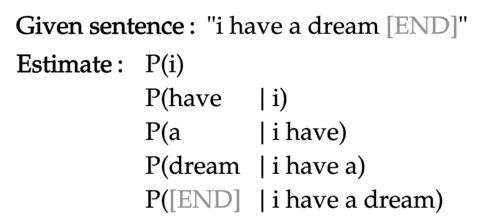


**Uni-gram Assumptions**

1.   The `probability of each word is independent of any words before it`.
2.   It only depends on the `fraction of the number of times this word appears among all the words in the training text`. In other words, training the model is nothing but calculating these fractions for all unigrams in the training text.

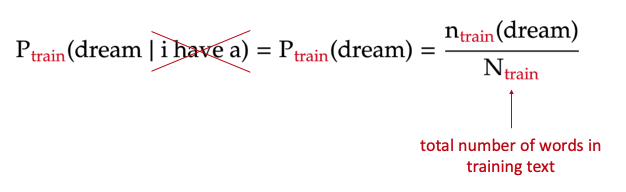

##How to evaluate our Uni-gram Model?

**How can we find out the probability of the sentence using word probabilities??**
*   **naive assumption** - Each word in the sentence is independent of each other **(markov assumption)**

*   each sentence probability is the product of word probabilities. 
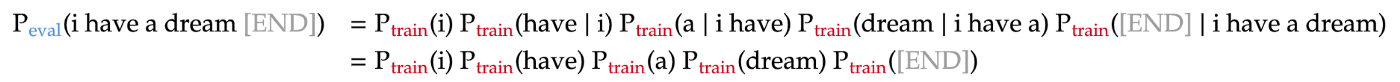



**Now How can we find out the probability of entire email text (having multiple sentences)??**


*   **Naive Assumption** - Each sentence is independent of from other sentences (same as words)
* The Probability of entire text is the product of probabilities of sentences
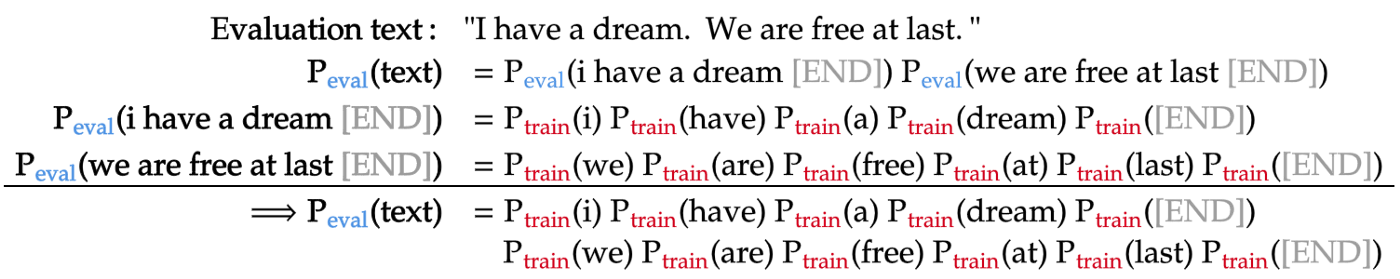



#**How we use this information to evaluate Bigram model ?**



> Bigram can be converted to a unigram by making a block of two consecutive words

## P (text)  = P(I have a dream) P(We are free at last)
###  P(I have a dream) = P(I/<start>) p(have/I) p(a/have) p(dream/a)
###  P(We are free at last) = P(we/<start>) p(are/we) p(free/are) p(at/free) p(last/at)



#**How about a Tri-gram model ?**


> Evaluate yourself (assignment/homework)



# Let's generalize this for N-Grams

*   The probability of each word depends on the n-1 words before it. For a trigram model (n = 3), for example, each word’s probability depends on the 2 words immediately before it.
*   This probability is estimated as the `fraction of times this n-gram appears among all the previous (n-1)-grams in the training set`. In other words,
training the n-gram model is nothing but calculating these conditional probabilities from the training text.

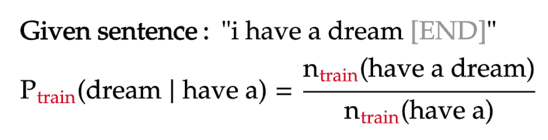

**Problem** - the words at the start of each sentence will not have a long enough context to apply the formula above.


How can we solve it ??

###Solution


1.   Pad these n-grams with sentence-starting symbols [S].
2.   **What will be formula for Trigram model then ??**

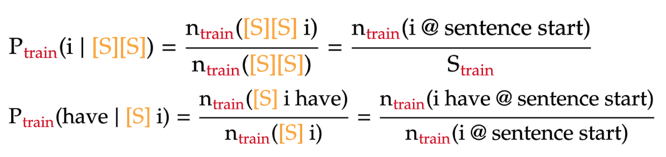



###Is there a problem with our evaluation method ??


<font color='red'>what do you think will happen if the length of the sentence is really long?</font>


**The probability will be very much less (near to 0) if the text length is too big, why ??**
*   Lets assume P(i) = p(have) = p(a)=.........= 0.9
*   p(I have) = p(I)xP(have) = 0.9x0.9 = 0.81
*   p(I have a) = p(I)xP(have)xP(a) = 0.9x0.9x0.9 = 0.73
*   p(I have a dream) = p(I)xP(have)xp(a)xp(dream) = 0.9x0.9x0.9x0.9 = 0.65

**So we can see the probability of sentence keeps on decreasing even if the probability of individual unigram is very high (0.9)**

*   The product of very small numbers keeps on decreasing and finally will become zero.
*Example; if your copus containes 100 words and probability of each word is 0.9, then the probability of text will be 0.9^(100) = 0.00002656139 (tending to 0)


**What is the solution ?**

**Can we use log to compare??**

*  Yes log is strictly increasing function in (0,infinity)
*   Take the log of probabilities and compare ??
*   Find Average of probabilities (Average log likelihood)

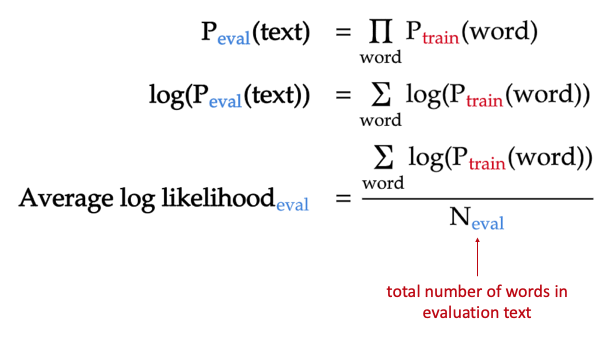


average log likelihood, which is simply the average of the trained log probabilities of each word in our evaluation text. In other words, the better our language model is, the probability that it assigns to each word in the evaluation text will be higher on average.

---
# So, How can we evaluate the model?
---

The problem of dealing with n grams and evaluation can be solved by the same method that we solved for unigrams

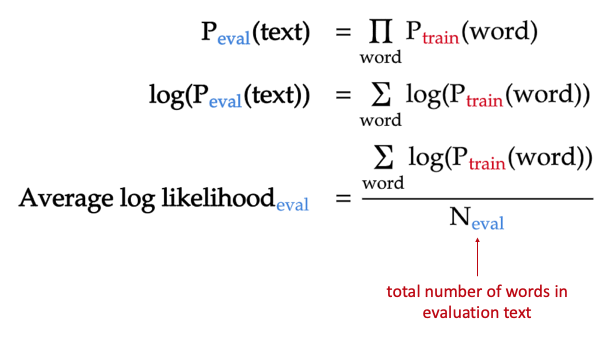

###Other Evaluation Metrics

Multiple other evaluation metrics have been proposed which include:

1.   **Cross-entropy** is the negative of average log likelihood
2.   **perplexity**, defined as the `exponential of cross-entropy`





## What is Perplexity?

For a test set W; containing words $w_1$, $w_2$, $w_3$, ... ,$w_n$
- The perplexity can be derived using:
    - PP(W) = P$(w_1, w_2, w_3, ... ,w_n)^{-1/n}$
    
    - $\sqrt[n]\frac{1}{P(w_1, w_2, w_3, ... ,w_n)}$
    
- Using chain rule of probability, we can expand:

    - PP(W) = $\sqrt[n]\prod_{i=1}^{n}\frac{1}{P(w_i | w_1....w_{i-1})}$
    
- For a bi-gram model, the perplexity of W can be calculated using:
    - $\sqrt[n]\prod_{i=1}^{n}\frac{1}{P(w_i | w_{i-1})}$
    
- **Lower** the **perplexity** score, **higher** the model's **understanding** of the language.

**How to deal with unknown unigrams??** - For a unigram that appears in the evaluation text but not in the training text, its count in the training text — hence its probability — will be zero. 


AND                                            
the `log of this zero probability is negative infinity`, leading to a negative infinity average log likelihood for the entire model

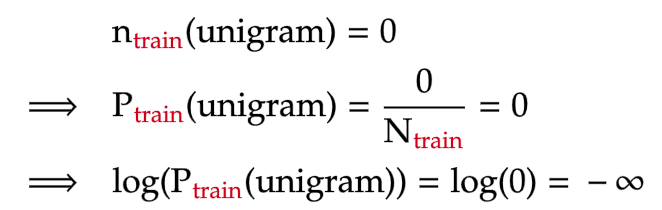

**How can we solve the above problem ??**


#How to solve the new tokens appearing in the evaluation set
1. We add an `artificial unigram called [UNK]` to the list of unique unigrams in the training text. 
2. This represents all the `unknown tokens that the model might encounter` during evaluation. 


> Of course, the count for this unigram will be zero in the training set, and the unigram vocabulary size — number of unique unigrams — will increase by 1 after this new unigram is added.



## What happens if there are un-seen words in the test set?
- Un-seen words are called as OOV or Out-Of-Vocabulary words.
- LMs are dependent on the training corpus and N-gram models work well only if the test corpus is similar to the training dataset.

### There are two approaches to handle:
1. We can `convert the corpus into a closed vocabulary system` by choosing a fixed vocabulary in advance:
    - Choose a vocabulary list that is fixed in advance.
    - Sample a set of words (whose count is less than a threshold) and replace them with < UNK >.
2. We can `assign probability to unseen words than having zero probability`.
    - We can shave off the probability mass from more frequent words and give it to the words we've not seen before using techniques like Laplace Smoothing, K-smoothing or Backoff and Interpolation.

---
# What is Laplace smoothing?
---
1. Add a pseudo-count of k to all the unigrams in our vocabulary.


> This will make the count of [UNK] k from 0 (0+K)


> The probability of word appearing in eval set but not in training set will not have 0 probability now, why ?? 

2. The most common value of k is 1, and this goes by the intuitive name of “add-one smoothing”.

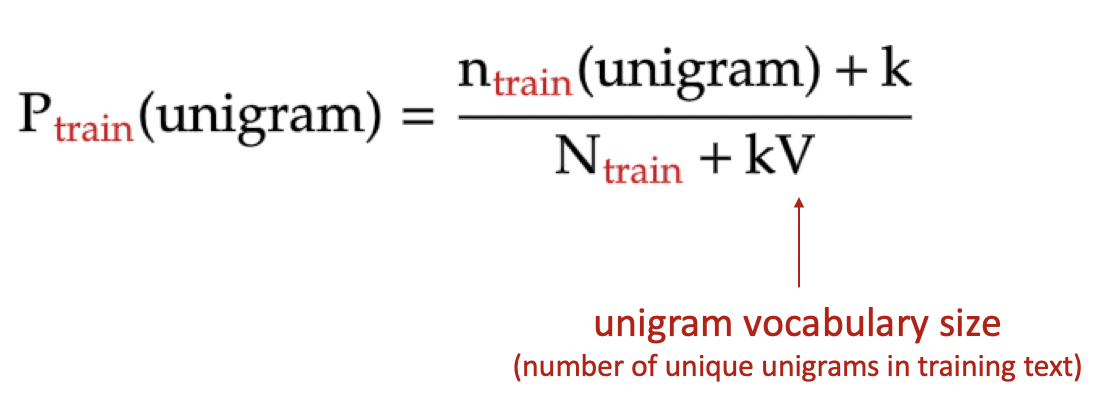


1. As a result, for each unigram, the numerator of the probability formula will be the raw count of the unigram plus k, the pseudo-count from Laplace smoothing. 
2. Furthermore, the denominator will be the total number of words in the training text plus the unigram vocabulary size times k. 

> This is because each unigram in our vocabulary has k added to their counts, which will add a total of (k × vocabulary size) to the total number of unigrams in the training text.


###**What are effect of Laplace smoothing?**
Because of the additional pseudo-count k to each unigram, each time the unigram model encounters an unknown word in the evaluation text, it will convert said unigram to the unigram [UNK].

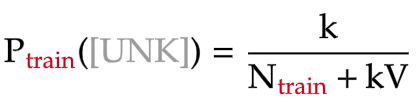

### **K-Smoothing**
- Instead of adding one to each count, we can add a fractional count $k$. 
- K can take values from 0 until 1, for e.g.: - 0.5, 0.05, 0.01 etc.
- K must be chosen carefully by optimizing on the dev set.
- K Smoothing can be derived using:
    - $P_{Add-k}^*(w_n|w_{n-1})$ = $\frac {C(w_{n-1}w_n) + k} {C(w_{n-1}) + kV}$

### **Backoff and Interpolation**
- Most applied technique for OOV and produces the best results when compared to smoothing techniques.
- Instead of smoothing and shifting the distribution, we can rely on the knowledge we have already computed.
- In this technique, if we have no examples of a particular tri-gram P($w_n|w_{n−2}w{n−1}$) , we can simply estimate its probability by using the bigram probability P($w_n|w{n−1}$). 
- In case we dont have counts to compute probability of the bi-gram, we can cascade and use the probability of the unigram P($w_n$). 
- Using interpolation helps in generalization across different contexts. 
- Techniques to make the interpolation effective:
    - Linear interpolation - Probabilities across each n-gram will have same weightage.
    - "λ" interpolation - Weights are assigned to the probabilities based on their computation method. 
        - Tri-gram probabilites will have the highest weights, followed by bi-gram and uni-gram.    
        P($w_n|w_{n−2}w{n−1}$) = $λ1P(w_n) +λ2P(w_n|w_{n−1}) +λ3P(w_n|w_{n−2}w_{n−1})$

##Which method will you choose and why?? 

---
# What are some ambiguities in Natural Language Processing?
---

1.   **Lexical Ambiguity** - ambiguity in a single word 
           - word silver is a noun, an adjective, or a verb?
2.   **Syntactic Ambiguity** - When sentence is parsed in different way
           - “The man saw the girl with a telescope” what does it mean?? ---- whether the man saw the girl carrying a telescope or he saw her through his telescope
        

3.   **Semantic Ambiguity** - when the meaning of the words themselves can be misinterpreted
           -  “The car hit the pole while it was moving” meaning ??
          “The car, while moving, hit the pole” or “The car hit the pole while the pole was moving”
4.   **Anaphoric Ambiguity** - ambiguity arises due to the use of anaphora entities in discourse
           - "the horse ran up the hill. It was very steep. It soon got tired." -- It is used for mapping to hill and horse both at different places
5.   **Pragmatic ambiguity** - When context of a phrase gives it multiple interpretations
           - “I like you too” means what ??
          I like you (just like you like me), OR
          I like you (just like someone else does).



## What are the limitations of N-gram approach to Language Modeling?
- Higher the N, the better is the model. But this leads to high computation overhead and would require large computation power, which may not be easily available.
- N-grams are a sparse representation of language. This is because we build the model based on the probability of words co-occurring. Zero probabilities are assigned to words that are not present in the training corpus.
- Even with techniques to build non-zero probability models, the results may not be accurate in case of generalization of words over multiple contexts.

---
# Understand the dataset
---

In [50]:
import os

## For pre-processing email data
import email

import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
from os import path
import re
import csv
import tensorflow as tf
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

## For visualization!!
from wordcloud import WordCloud,STOPWORDS 

from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.translate.bleu_score import sentence_bleu
from sklearn.utils import shuffle
import nltk
import random 
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
from multiprocessing import  Pool
from nltk.corpus import reuters


In [2]:
!wget -O emails.csv --no-check-certificate "https://drive.google.com/u/0/uc?id=17fzk_EPkPuHeXuCEwkTvsYZ4TdzLFqGy&export=download&confirm=t"

--2023-04-28 14:53:54--  https://drive.google.com/u/0/uc?id=17fzk_EPkPuHeXuCEwkTvsYZ4TdzLFqGy&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.101, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=17fzk_EPkPuHeXuCEwkTvsYZ4TdzLFqGy&export=download&confirm=t [following]
--2023-04-28 14:53:54--  https://drive.google.com/uc?id=17fzk_EPkPuHeXuCEwkTvsYZ4TdzLFqGy&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ngh64gqp9nc4e2ebult4dr33qfr8pmf/1682693625000/16342861108597332581/*/17fzk_EPkPuHeXuCEwkTvsYZ4TdzLFqGy?e=download&uuid=b1e0ab3f-4127-456c-b7a4-ffca10525015 [following]
--2023-04-28 14:53:54--  https://doc-08-1g

In [3]:
df = pd.read_csv("/content/emails.csv")
df = df.sample(frac=0.35, random_state=42)
df.reset_index(inplace = True, drop = True)

In [4]:
df.head()

,file,message
0,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...
1,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...
2,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...
3,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...
4,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...


In [5]:
df.shape

(181090, 2)

- We can see that there are total 1,81,090 emails in data

# Lets have a look at an example of this dataset

In [6]:
df['message'][0]

'Message-ID: <21013688.1075844564560.JavaMail.evans@thyme>\nDate: Tue, 29 Aug 2000 01:26:00 -0700 (PDT)\nFrom: sara.shackleton@enron.com\nTo: william.bradford@enron.com\nSubject: Re: Credit Derivatives\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Sara Shackleton\nX-To: William S Bradford\nX-cc: \nX-bcc: \nX-Folder: \\Sara_Shackleton_Dec2000_June2001_1\\Notes Folders\\Sent\nX-Origin: SHACKLETON-S\nX-FileName: sshackle.nsf\n\nBill:  Thanks for the info.   I also spoke with Jeff about how \nEnronCredit.com Ltd. was going to work since Dennis O\'Connell (London lawyer) \nis responsible for that group.  Maybe you will be able to clarify which of \nJeff\'s "positions" will be hedges and which will be backed to EnronCredit.  \nMaybe Rod will be handling most of Jeff\'s credit.  I\'d appreciate an update.  \nSara\n\n\n\n\tWilliam S Bradford\n\t08/29/2000 07:24 AM\n\t\t\n\t\t To: Sara Shackleton/HOU/ECT@ECT\n\t\t cc: Mark Taylor/HOU/EC

# Extracting the content of these messages

In [7]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['content'] = body(df['message'])

In [8]:
df.head()

,file,message,content
0,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,Bill: Thanks for the info. I also spoke wit...
1,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,"Aimee,\nPlease check meter #1591 Lamay gas lif..."
2,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,GCCA Crawfish and rip-off raffle & over-priced...
3,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,"<<Keoni.zip>> Chris, per your request here ar..."
4,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,I'm trying to change the Receipt Meter on deal...


# Processing this content:
- Let' remove all non-alphabetic characters
- Convert all content to lower case 
- And remove extra spaces at the beginning and the end

In [9]:
df.content = df.content.str.replace("\n","")
df.content = df.content.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
df.content = df.content.str.lower()
df.content = df.content.str.strip() 

In [10]:
df.head()

,file,message,content
0,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,bill thanks for the info i also spoke with jef...
1,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,aimee please check meter 1591 lamay gas lift i...
2,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,gcca crawfish and rip off raffle over priced p...
3,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,keoni zip chris per your request here are the ...
4,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,i m trying to change the receipt meter on deal...


# Tokenization
> Let's break the content into an array of tokens

In [11]:
df['body_list'] = df.content.apply(lambda x: x.split())

In [12]:
df.head()

,file,message,content,body_list
0,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,bill thanks for the info i also spoke with jef...,"[bill, thanks, for, the, info, i, also, spoke,..."
1,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,aimee please check meter 1591 lamay gas lift i...,"[aimee, please, check, meter, 1591, lamay, gas..."
2,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,gcca crawfish and rip off raffle over priced p...,"[gcca, crawfish, and, rip, off, raffle, over, ..."
3,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,keoni zip chris per your request here are the ...,"[keoni, zip, chris, per, your, request, here, ..."
4,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,i m trying to change the receipt meter on deal...,"[i, m, trying, to, change, the, receipt, meter..."


# EDA
**Let's have a look at the distribution of length of emails** 

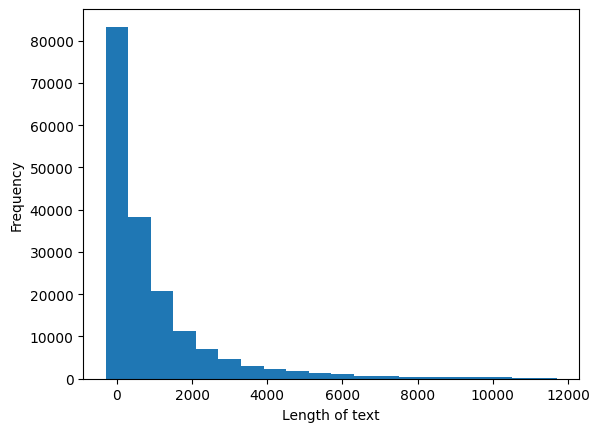

In [13]:
if __name__ == "__main__":
  # EDA for text length
  x = list(df['content'].apply(lambda x:len(x)))
  plt.hist(x,range=[1,12000],bins = 20,align ='left')
  plt.rcParams["figure.figsize"] = (10,4)
  plt.xlabel("Length of text")
  plt.ylabel("Frequency")

In [14]:
if __name__ == "__main__":
  for i in range(0,110,10):
    print("{}th- percentile of len(text) is {}".format(i,np.percentile(x, i)))
    print("="*40)
  x =None
  del(x)
  gc.collect()

0th- percentile of len(text) is 0.0
10th- percentile of len(text) is 100.0
20th- percentile of len(text) is 199.0
30th- percentile of len(text) is 325.0
40th- percentile of len(text) is 483.0
50th- percentile of len(text) is 687.0
60th- percentile of len(text) is 956.0
70th- percentile of len(text) is 1314.0
80th- percentile of len(text) is 1909.0
90th- percentile of len(text) is 3282.0
100th- percentile of len(text) is 1594315.0


**Observations**
- From above plot it is clear that length of text ranges from 0 to 1594315 
- Distribution for the length of text is looks like power-law distribution
- Which has frequency for sort sentences higher than long sentences
- As we can see above from percentile values 90 percent of text has max length 3277 chars

# More EDA
**Visualize Email content using word cloud**

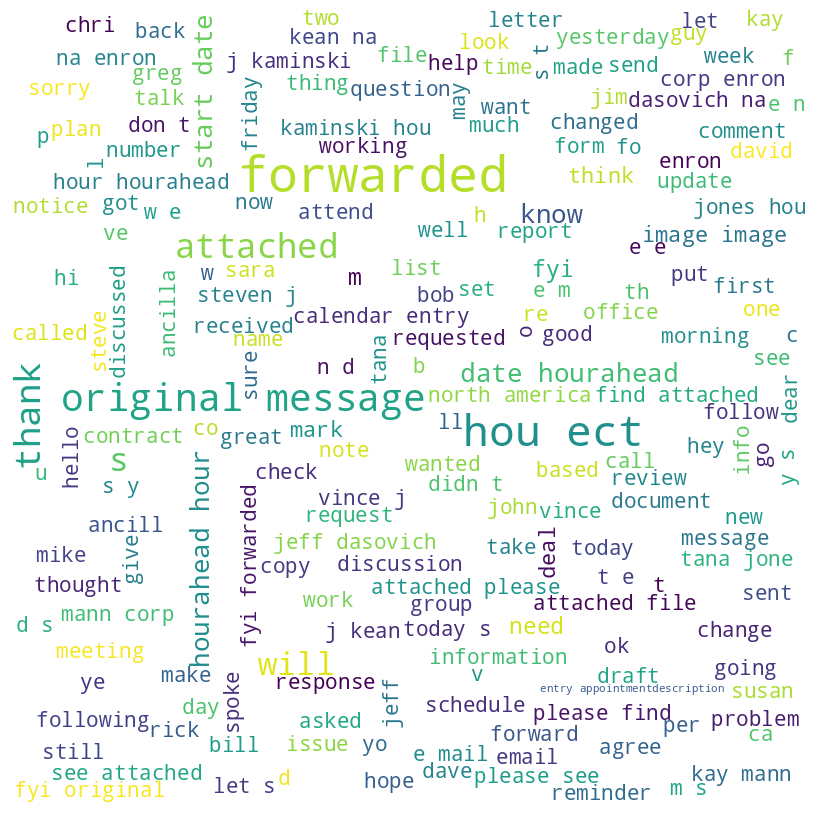

In [15]:
if __name__ == "__main__":
  # Word cloud for content , X-TO, X-From
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS , 
                max_font_size = 50,
                min_font_size = 10).generate(df['content'].to_string()) 
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  
  plt.show() 

**Find out most frequent words**
*   What idea can most frequent word give?
*   Analysis if any unwanted word is occuring many times



In [16]:
# most frequent words
def word_count(str):
    ''' 
    Function that get string and counts each word in the string 
    '''
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        elif(len(word)>2):
            counts[word] = 1
    return counts

In [17]:
if __name__ == "__main__":
  # moost 100 frequent words in content
  most_frequent_words = Counter(word_count(str(df['content'].to_string()))).most_common(100)
  print('\n'.join(map(str, most_frequent_words)))
  most_frequent_words = None
  del(most_frequent_words)
  gc.collect()


('the', 55709)
('...', 32002)
('you', 27140)
('for', 18368)
('forwarded', 17007)
('this', 16368)
('and', 13695)
('from', 12579)
('have', 12192)
('please', 12119)
('attached', 10966)
('are', 10647)
('that', 9848)
('ect', 9708)
('hou', 9685)
('enron', 8996)
('message', 8887)
('your', 8548)
('original', 7973)
('with', 7878)
('will', 7203)
('thanks', 6452)
('here', 5932)
('fyi', 4770)
('just', 4749)
('has', 4705)
('can', 4506)
('sent', 4350)
('not', 4275)
('all', 4189)
('our', 4036)
('see', 3987)
('know', 3934)
('was', 3934)
('image', 3850)
('date', 3783)
('t...', 3664)
('2...', 3574)
('vince', 3536)
('what', 3455)
('start', 3402)
('mark', 3399)
('hourahead', 3393)
('would', 3364)
('jeff', 3309)
('hour', 3275)
('been', 3158)
('get', 3049)
('good', 2986)
('dear', 2952)
('com', 2921)
('about', 2905)
('out', 2852)
('call', 2842)
('corp', 2830)
('like', 2759)
('today', 2690)
('following', 2660)
('new', 2572)
('a...', 2521)
('let', 2520)
('meeting', 2509)
('need', 2497)
('find', 2483)
('there',

# Train - Test split

In [18]:
shuffle_df = df.sample(frac=1, random_state=42)

# Define a size for your train set 
train_size = int(0.7 * len(df))

# Split your dataset 
train_set = shuffle_df[:train_size]
train_set.reset_index(inplace=True, drop=True)

test_set = shuffle_df[train_size:].copy()
test_set.reset_index(inplace=True, drop=True)

# Next Word prediction

In [19]:
import pandas as pd
df = train_set.copy()
df.head()

,file,message,content,body_list
0,tholt-j/discussion_threads/174.,Message-ID: <1554784.1075857488732.JavaMail.ev...,forwarded by jane m tholt hou ect on 11 27 200...,"[forwarded, by, jane, m, tholt, hou, ect, on, ..."
1,kean-s/all_documents/409.,Message-ID: <530637.1075846150302.JavaMail.eva...,kelly raised this concern too the system is se...,"[kelly, raised, this, concern, too, the, syste..."
2,shapiro-r/japan/7.,Message-ID: <14842993.1075844258403.JavaMail.e...,some thoughts 1 we argue against the pjm insta...,"[some, thoughts, 1, we, argue, against, the, p..."
3,lay-k/all_documents/160.,Message-ID: <27787651.1075840204674.JavaMail.e...,mr christman thank you for your invitation for...,"[mr, christman, thank, you, for, your, invitat..."
4,mann-k/all_documents/3727.,Message-ID: <26662615.1075845667335.JavaMail.e...,we are pleased to announce organizational chan...,"[we, are, pleased, to, announce, organizationa..."


In [20]:
corpus = df['body_list'].to_list()

## Creating a bi-gram model

In [21]:
def build_bigram_model(corpus):
  # Create a placeholder for model
  bigram_model1 = defaultdict(lambda: defaultdict(lambda: 0))

  # Count frequency of co-occurance  
  for sentence in corpus:
      for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
          bigram_model1[(w1)][w2] += 1
  
  # Let's transform the counts to probabilities
  for w1 in bigram_model1:
      print(w1)
      break
      total_count = float(sum(bigram_model1[w1].values()))
      for w2 in bigram_model1[w1]:
          bigram_model1[w1][w2] /= total_count
  
  return bigram_model1

In [22]:
bigram = build_bigram_model(corpus)

None


In [23]:
def get_next_word(model, input_string):
    if len(input_string.split()) > 1:
        input_string_ = input_string.split()
        output = dict(model[tuple(input_string_)])
        return "{} {}".format(input_string,
            list({k: v for k, v in sorted(output.items(), key=lambda item: item[1], reverse=True)})[0])
    else:
        input_string = (input_string)
        output = dict(model[input_string])
        return "{} {}".format(input_string,
            list({k: v for k, v in sorted(output.items(), key=lambda item: item[1], reverse=True)})[0])

In [24]:
get_next_word(bigram, 'how')

'how to'

In [25]:
get_next_word(bigram, 'they')

'they are'

In [26]:
get_next_word(bigram, 'we')

'we have'

In [27]:
get_next_word(bigram, 'what')

'what is'

In [28]:
get_next_word(bigram, 'can')

'can be'

In [29]:
get_next_word(bigram, 'i')

'i have'

In [30]:
get_next_word(bigram, 'have')

'have a'

In [31]:
get_next_word(bigram, 'a')

'a href'

In [32]:
get_next_word(bigram, 'href')

'href http'

In [33]:
get_next_word(bigram, 'http')

'http www'

### NOTES : See how preprocessing steps that includes cleaning of urls is so important !

## Creating a Tri-gram Model

In [34]:
def build_trigram_model(corpus):
  # Create a placeholder for model
  trigram_model = defaultdict(lambda: defaultdict(lambda: 0))

  # Count frequency of co-occurance  
  for sentence in corpus:
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        trigram_model[(w1, w2)][w3] += 1
          # break

  
  # Let's transform the counts to probabilities
  for w1_w2 in trigram_model:
    total_count = float(sum(trigram_model[w1_w2].values()))
    for w3 in trigram_model[w1_w2]:
        trigram_model[w1_w2][w3] /= total_count
  
  return trigram_model



In [35]:
trigram_model = build_trigram_model(corpus)

In [36]:
get_next_word(trigram_model,'i may')

'i may be'

In [37]:
get_next_word(trigram_model,'can we')

'can we get'

In [38]:
get_next_word(trigram_model,'i will')

'i will be'

In [39]:
get_next_word(trigram_model,'will be')

'will be a'

In [40]:
get_next_word(trigram_model,'be a')

'be a good'

In [41]:
get_next_word(trigram_model,'a good')

'a good idea'

In [42]:
get_next_word(trigram_model,'good idea')

'good idea to'

In [43]:
def complete_sentence(model, input_str, count, ngrams=2):

  for i in range(count):
    curr_ngram = input_str.split()[-ngrams+1:]
    curr_ngram = " ".join(curr_ngram)
    nxt_word = get_next_word(model, curr_ngram).split()[-1]
    
    input_str += ' ' + nxt_word
    print('Step '+str(i)+' '+input_str)


In [44]:
complete_sentence(trigram_model,'can we', 10, 3)

Step 0 can we get
Step 1 can we get the
Step 2 can we get the best
Step 3 can we get the best of
Step 4 can we get the best of luck
Step 5 can we get the best of luck in
Step 6 can we get the best of luck in your
Step 7 can we get the best of luck in your group
Step 8 can we get the best of luck in your group that
Step 9 can we get the best of luck in your group that were


# Perplexity

In [45]:
def perplexity(n_gram, input_sentence):
    tokenized_sentence = input_sentence.split()
    pp_w = []
    N = len(tokenized_sentence)
    
    if n_gram == 2:
        tokenized_sentence.insert(0, None)
        tokenized_sentence.append(None)
        for i in tokenized_sentence[:-1]:
            try:
                pp_w.append(1 / (0.0001+bigram[(i)][tokenized_sentence[tokenized_sentence.index(i)+1]]))
            except:
                continue
                
    if n_gram == 3:
        tokenized_sentence.insert(0, None)
        tokenized_sentence.insert(0, None)
        tokenized_sentence.append(None)
        tokenized_sentence.append(None)
        for i in tokenized_sentence[:-1]:
            #smoothing applied(added 0.0001)
            pp_w.append(1/(0.0001+trigram_model[tuple([i, tokenized_sentence[tokenized_sentence.index(i)+1]])][tokenized_sentence[tokenized_sentence.index(i)+2]]))
    
    
    if np.prod(pp_w) != 0:
        return round(np.prod(pp_w)**(1/N), 2)
    else:
        print("Cant find perplexity for the sentence")

In [46]:
perplexity_dict = {'content':[],'bi-gram_score':[], 'tri-gram_score':[]}
for i in range(20):
  try:
    body = test_set['content'][i]
    tri_gram = perplexity(3, test_set['content'][i])
    bi_gram = perplexity(2, test_set['content'][i])
    perplexity_dict['content'].append(body)
    perplexity_dict['bi-gram_score'].append(bi_gram)
    perplexity_dict['tri-gram_score'].append(tri_gram)
  except Exception as e:
    perplexity_dict['content'].append(body)
    perplexity_dict['bi-gram_score'].append(e)
    perplexity_dict['tri-gram_score'].append(e)
df2 = pd.DataFrame(perplexity_dict)
df2

Cant find perplexity for the sentence
Cant find perplexity for the sentence
Cant find perplexity for the sentence
Cant find perplexity for the sentence
Cant find perplexity for the sentence
Cant find perplexity for the sentence


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,content,bi-gram_score,tri-gram_score
0,hello could you be a dearest and send me a cop...,0.09,672.72
1,brent i would like this to become formal polic...,NaN,inf
2,sorry about this i forgot i ll give it a look ...,NaN,13.03
3,start date 1 31 02 hourahead hour 21 no ancill...,0.00,3.43
4,fyi original message from customernotices wgph...,0.05,8.49
5,eb 4102 has been reserved for this meeting adr...,0.03,227.93
6,you won t get me to bet on this one keffer joh...,NaN,inf
7,here is what vickie told me about capacity on ...,0.02,22.85
8,there is visupro data for trent on the network...,0.24,3022.00
9,i would like to set up a tee time for 2 people...,0.01,167.12


# Creating an n-gram model

In [47]:
del bigram
del trigram_model
del df
del train_set
del STOPWORDS
del shuffle_df
gc.collect()

0

In [48]:
def build_ngram_model(corpus, ngrams=2):
  ngram_model = defaultdict(lambda: defaultdict(lambda: 0))

  for sentence in tqdm(corpus):
    for i_ngram in range(ngrams, len(sentence)):
      ngram_model[tuple(sentence[i_ngram - ngrams + 1 :i_ngram])][sentence[i_ngram]]+=1
  
  for words in ngram_model:
    total_count = float(sum(ngram_model[words].values()))
    for w2 in ngram_model[words]:
        ngram_model[words][w2] /= total_count
  
  return ngram_model

ngram = build_ngram_model(corpus, ngrams=4)

100%|██████████| 126762/126762 [01:53<00:00, 1115.74it/s]


In [49]:
complete_sentence(ngram,'how have you', 10, 4)

Step 0 how have you been
Step 1 how have you been able
Step 2 how have you been able to
Step 3 how have you been able to get
Step 4 how have you been able to get a
Step 5 how have you been able to get a copy
Step 6 how have you been able to get a copy of
Step 7 how have you been able to get a copy of the
Step 8 how have you been able to get a copy of the letter
Step 9 how have you been able to get a copy of the letter agreement


## Which MODEL is performing better ?

## Inference:
- We pick a language model that has the lowest perplexity score on the test data.


In [ ]:
## HW: Calculate perplexity scores for all the variants we have seen - bi, tri, quad

# next steps (advanced techniques)



1.   We can use Sequential models like LSTMs, Transformers etc to enhance the accuracy that we will cover in further lectures



---
# How can we can overcome the limitations of N-gram based Lanugage Models 
---
- By using Neural Language Models.
- Neural Language Models (NLM) address the n-gram issues through parameterization of words as vectors (word embeddings) and using them as inputs to a neural network.
- We could use robust architectures like RNN and Encoders to understand word contexts better, there-by being more accurate in predicting the next set of words.

## Conclusion:
- We have modelled the problem of helping people write emails faster as "next-word" prediction problem.
- We have explored Probabilistic Language Models.
- We auto-completed the sentence by building bi-gram and tri-gram language models.
- We saw how Smoothing and interpolation techniques can help over-come the dis-advantages of Out Of Vocabulary (OOV).

# Further Reading

https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3

https://nlp.stanford.edu/~wcmac/papers/20050421-smoothing-tutorial.pdf